In [5]:
#Preparing Data
import keras
from keras.datasets import mnist
#load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print(y_train.shape)

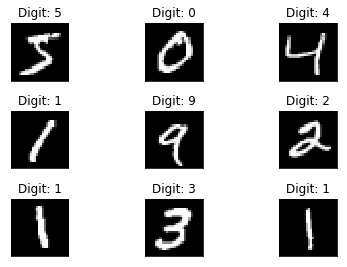

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    fig 

In [7]:
#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(y_train.shape)

X_train shape: (60000, 28, 28, 1)
(60000,)


In [9]:
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
print(y_train.shape)

(60000, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_category, activation = 'softmax'))


In [11]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [12]:
model_log = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.2810 - acc: 0.9138 - val_loss: 0.0567 - val_acc: 0.9819
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0909 - acc: 0.9731 - val_loss: 0.0426 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0679 - acc: 0.9802 - val_loss: 0.0375 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0576 - acc: 0.9824 - val_loss: 0.0326 - val_acc: 0.9892
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0492 - acc: 0.9852 - val_loss: 0.0303 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0270 - val_acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0390 - acc: 0.9882 - val_loss: 0.0289 - 

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.027758799017216187
Test accuracy: 0.9916


([<matplotlib.axis.XTick at 0x134d59160>,
 <a list of 10 Text xticklabel objects>)

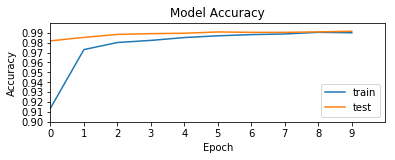

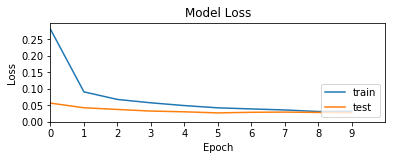

In [32]:
import os
import numpy as np
#accuracy plot
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.axis([0,10,0.9,1])
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.yticks(np.arange(0.9,1,0.01))
plt.xticks(np.arange(0, 10, 1))
#loss plot
fig = plt.figure()
plt.subplot(2, 1, 2)
plt.axis([0,10,0,0.3])
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.yticks(np.arange(0,0.3,0.05))
plt.xticks(np.arange(0, 10, 1))